In [1]:
file = r"C:\Users\adishree.b\Downloads\just.xlsx"

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from itertools import product

In [5]:
data = pd.read_excel(file)

In [14]:
data

,a,b,c,d,e,f,g
0,3,26,71,45,28,17,0
1,7,3,61,32,23,97,0
2,11,56,48,64,11,72,1
3,13,66,48,41,85,39,0
4,14,33,33,56,62,79,0
5,18,74,79,92,98,17,0
6,18,63,35,6,16,16,1
7,23,7,30,89,53,53,0
8,26,8,58,52,67,2,0
9,27,33,86,17,75,1,0


In [7]:
data.describe()

,a,b,c,d,e,f,g
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.0000,50.00000
mean,53.220000,49.000000,49.940000,50.180000,49.180000,50.7200,0.30000
std,26.178578,25.013466,22.083709,30.028347,26.811275,30.1527,0.46291
min,3.000000,0.000000,3.000000,1.000000,3.000000,1.0000,0.00000
25%,32.000000,33.250000,34.250000,27.750000,25.500000,22.5000,0.00000
50%,51.000000,48.500000,53.500000,46.000000,51.000000,52.5000,0.00000
75%,75.750000,63.000000,64.750000,75.750000,69.000000,76.5000,1.00000
max,95.000000,96.000000,91.000000,98.000000,99.000000,98.0000,1.00000


In [8]:
data0 = data[data['g']==0]

In [9]:
data1 = data[data['g']==1]

In [10]:
X = data.iloc[:,1:3]/100
dataX = data.drop(['a','d','e','f'],axis = 1)

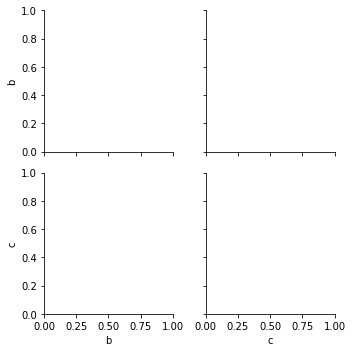

In [13]:
sns.PairGrid(X)

In [12]:
dataX.head()

,b,c,g
0,26,71,0
1,3,61,0
2,56,48,1
3,66,48,0
4,33,33,0


In [15]:
X.shape

(50, 2)

In [16]:
y = data.iloc[:,6]

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25, random_state = 4)

In [18]:
X_train.shape

(37, 2)

In [19]:
X_test.shape

(13, 2)

In [20]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
metrics.accuracy_score(y_test,y_pred)

0.7692307692307693

In [21]:
k_range = range(1,31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scoring = cross_val_score(knn, X,y,cv=10,scoring="accuracy")
    k_scores.append(scoring.mean())
print(k_scores)

[0.7166666666666667, 0.7333333333333334, 0.7666666666666666, 0.8333333333333334, 0.825, 0.8166666666666667, 0.7583333333333333, 0.7833333333333333, 0.7833333333333333, 0.7333333333333334, 0.775, 0.775, 0.7833333333333333, 0.7666666666666666, 0.7583333333333333, 0.8, 0.7833333333333334, 0.825, 0.7666666666666666, 0.7916666666666666, 0.7583333333333334, 0.75, 0.7333333333333334, 0.7916666666666666, 0.7666666666666667, 0.6583333333333333, 0.6583333333333333, 0.7083333333333333, 0.7083333333333333, 0.7083333333333333]


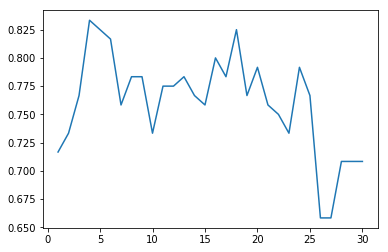

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(k_range, k_scores)
plt.xlabel = ('valuse of k in knn')
plt.ylabel = ("Cross_validation accuracy")

In [23]:
knn_4 = KNeighborsClassifier(n_neighbors=4)

In [24]:
cross_val_score(knn_4, X,y,cv=10,scoring="accuracy").mean()

0.8333333333333334

In [41]:
predict(self,X)

NameError: name 'predict' is not defined

In [136]:
 clf = LogisticRegression(random_state=0, solver='lbfgs',
                multi_class='multinomial').fit(X, y)

In [137]:
clf.predict_proba(X_test)

array([[0.68865788, 0.31134212],
       [0.71066051, 0.28933949],
       [0.6974324 , 0.3025676 ],
       [0.70643558, 0.29356442],
       [0.71641455, 0.28358545],
       [0.66882063, 0.33117937],
       [0.72110637, 0.27889363],
       [0.70966624, 0.29033376],
       [0.73201155, 0.26798845],
       [0.69152432, 0.30847568],
       [0.70649137, 0.29350863],
       [0.72137436, 0.27862564],
       [0.66367039, 0.33632961]])

In [138]:
clf.score(X, y)

0.7

In [44]:
from sklearn.neighbors import (NeighborhoodComponentsAnalysis,KNeighborsClassifier)

from sklearn.pipeline import Pipeline
nca = NeighborhoodComponentsAnalysis(random_state=42)
knnd = KNeighborsClassifier(n_neighbors=4)
nca_pipe = Pipeline([('nca', nca), ('knn', knnd)])
nca_pipe.fit(X_train, y_train) 
print(nca_pipe.score(X_test, y_test)) 
print(nca_pipe)

0.7692307692307693
Pipeline(memory=None,
         steps=[('nca',
                 NeighborhoodComponentsAnalysis(callback=None, init='auto',
                                                max_iter=50, n_components=None,
                                                random_state=42, tol=1e-05,
                                                verbose=0, warm_start=False)),
                ('knn',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=4, p=2,
                                      weights='uniform'))],
         verbose=False)


In [143]:
# Training classifiers
clf1 = DecisionTreeClassifier(max_depth=4)
clf2 = KNeighborsClassifier(n_neighbors=4)
clf3 = SVC(gamma=.1, kernel='rbf', probability=True)
eclf = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2),
                                    ('svc', clf3)],
                        voting='soft', weights=[2, 1, 2])

clf1.fit(X, y)
clf2.fit(X, y)
clf3.fit(X, y)
eclf.fit(X, y)

VotingClassifier(estimators=[('dt', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0....',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=None, voting='soft',
         weights=[2, 1, 2])

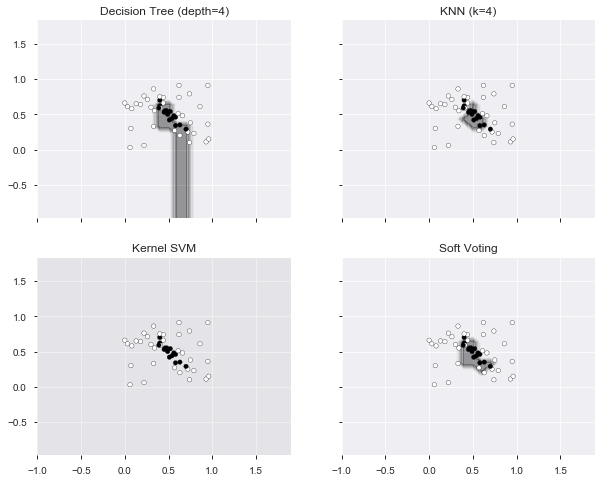

In [157]:
# Plotting decision regions
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [clf1, clf2, clf3, eclf],
                        ['Decision Tree (depth=4)', 'KNN (k=4)',
                         'Kernel SVM', 'Soft Voting']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X.iloc[:, 0], X.iloc[:, 1], c=y,
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

In [149]:
type(X)

pandas.core.frame.DataFrame

In [151]:
X[:, 5]

TypeError: unhashable type: 'slice'